In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter

In [8]:
def graphBasedOnNumWords(df: pd.DataFrame) -> None:
    """
    Graphs the number of words in each comment.
    :param df: The Pandas DataFrame.
    :return: None.
    """
    df["num_words"] = df["comment_text"].apply(lambda x: len(x.split()))
    df["num_words"].hist(bins=30, range=(0, 300),
                         weights=np.ones(len(df)) / len(df))
    plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))
    plt.title("Number of Words in Each Comment")
    plt.xlabel("Number of Words")
    plt.ylabel("Number of Comments")
    plt.show()
    plt.close()
    print(df["num_words"].describe())


def getFrequencyOfWords(df: pd.DataFrame) -> None:
    """
    Gets the frequency of words in all comment.
    :param df: The Pandas DataFrame.
    :return: None.
    """
    print(pd.Series(" ".join(df["comment_text"]).split()).value_counts()[:20])


def getFrequencyOfToxicWords(df: pd.DataFrame) -> None:
    """
    Gets the frequency of words in all comment.
    :param df: The Pandas DataFrame.
    :return: None.
    """

    # Toxicity types to filter by
    toxicValues = ["toxic", "severe_toxic", "obscene", "threat", "insult",
                   "identity_hate"]
    # toxicValues = ["identity_hate"]

    # Number of toxicity types
    numToxicTypes = 1
    # numToxicTypes = 6

    filteredDf = df.loc[df[toxicValues].sum(axis=1) >= numToxicTypes]

    print(pd.Series(" ".join(filteredDf["comment_text"]).split())
          .value_counts()[:20])

def getFrequencyOfEachToxicTag(df: pd.DataFrame) -> None:
    """
    For each of the 6 toxicity tags, it finds the number of rows
    in the pandas dataframe corresponding to that tag. Prints 
    that information and produces a corresponding plot
    :param df: The Pandas DataFrame.
    :return: None.
    """
    cols = data.columns
    tags = cols[2:-1]

    tagFrequencies = []

    for tag in tags:
        cnt = (data[tag] == 1).sum()
        percentage = round((cnt / data.shape[0]) * 100, 4)
        tagFrequencies.append((tag, percentage))
        print("Percentage with tag {col_name} is {x}%".format(col_name=tag,
                                                              x=percentage))

    print("\n\nThe following represents a bar graph of the same\n")

    tagFrequencies = sorted(tagFrequencies, key=lambda x: x[1], reverse=True)

    x_axis_tags = [pr[0] for pr in tagFrequencies]
    y_axis_percentages = [pr[1] for pr in tagFrequencies]

    # create a bar graph
    plt.bar(x_axis_tags, y_axis_percentages, color='maroon', width=0.4)

    # set the title and labels
    plt.title('Toxicity Tag Frequency Percentages')
    plt.xlabel('Toxicity Tag')
    plt.ylabel('Percentage')

    # display the graph
    plt.show()

In [9]:
data = pd.read_csv("/kaggle/input/toxic-message-classifier-dataset/train_cleaned.csv")

data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text_words
0,0000997932d777bf,explanation\n edits made username hardcore ...,0,0,0,0,0,0,"['explanation', 'edits', 'made', 'username', '..."
1,000103f0d9cfb60f,daww matches background colour im seemingly ...,0,0,0,0,0,0,"['daww', 'matches', 'background', 'colour', 'i..."
2,000113f07ec002fd,hey man im really trying edit war guy c...,0,0,0,0,0,0,"['hey', 'man', 'im', 'really', 'trying', 'edit..."
3,0001b41b1c6bb37e,cant make real suggestions improvement won...,0,0,0,0,0,0,"['cant', 'make', 'real', 'suggestions', 'impro..."
4,0001d958c54c6e35,sir hero chance remember page thats,0,0,0,0,0,0,"['sir', 'hero', 'chance', 'remember', 'page', ..."


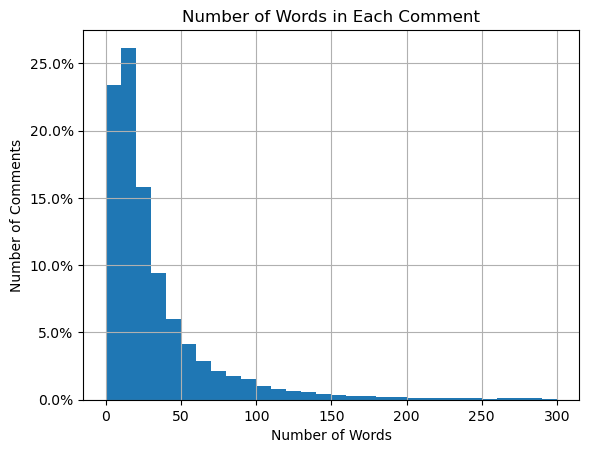

count    149348.000000
mean         36.412239
std          53.904201
min           4.000000
25%          10.000000
50%          20.000000
75%          40.000000
max        1250.000000
Name: num_words, dtype: float64


In [10]:
graphBasedOnNumWords(data)

In [11]:
getFrequencyOfWords(data)

article      55303
page         45511
wikipedia    35516
talk         31061
please       29482
would        29176
one          27975
like         27624
dont         25986
see          21362
also         20482
think        19943
im           19401
know         18908
people       17667
edit         17514
articles     17495
use          16299
may          15507
time         15364
dtype: int64


Percentage with tag toxic is 9.3299%
Percentage with tag severe_toxic is 0.9655%
Percentage with tag obscene is 5.1069%
Percentage with tag threat is 0.302%
Percentage with tag insult is 4.7821%
Percentage with tag identity_hate is 0.8684%
Percentage with tag comment_text_words is 0.0%


The following represents a bar graph of the same



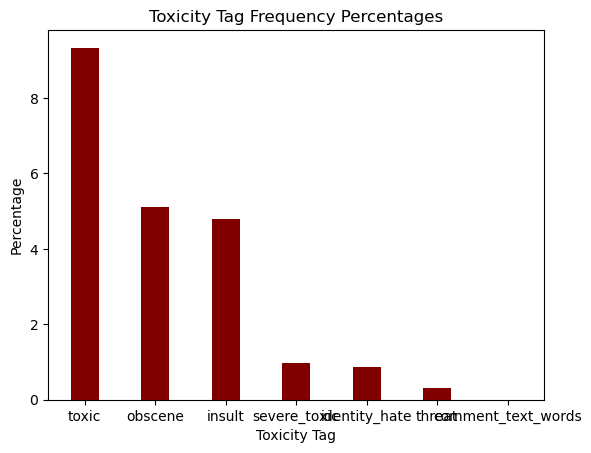

In [12]:
getFrequencyOfEachToxicTag(data)

In [14]:
# getFrequencyOfToxicWords(data)